In [1]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np

import sys
sys.path.append("../../")
import src.soporte_clustering as sc
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
data_pickle = pd.read_pickle("../../datos/output/df_final.pickle")
df = pd.DataFrame(data_pickle)
df

,Ship Mode,Customer ID,Segment,Market,Category,Sub-Category,Sales,Quantity,Order Priority
0,0.000000,0.500000,1.000000,0.905067,0.012385,0.418446,0.102006,0.461538,0.055833
1,0.270998,0.468750,0.354352,1.000000,0.000000,0.486297,0.163837,0.615385,0.055833
2,0.171119,0.593750,1.000000,1.000000,0.012385,0.471744,0.228586,0.615385,1.000000
3,0.171119,0.718750,0.000000,0.905632,0.012385,0.471744,0.127753,0.307692,1.000000
4,0.000000,0.062500,1.000000,0.395837,0.012385,0.257418,0.125122,0.538462,0.055833
...,...,...,...,...,...,...,...,...,...
51285,0.000000,0.625000,0.354352,1.000000,1.000000,0.294651,0.002856,0.307692,1.000000
51286,1.000000,0.864583,1.000000,0.905067,1.000000,0.168966,0.000000,0.000000,1.000000
51287,0.000000,0.750000,0.000000,0.905067,1.000000,0.297486,0.000993,0.153846,0.484172
51288,1.000000,0.739583,0.000000,0.933321,1.000000,1.000000,0.000574,0.076923,1.000000


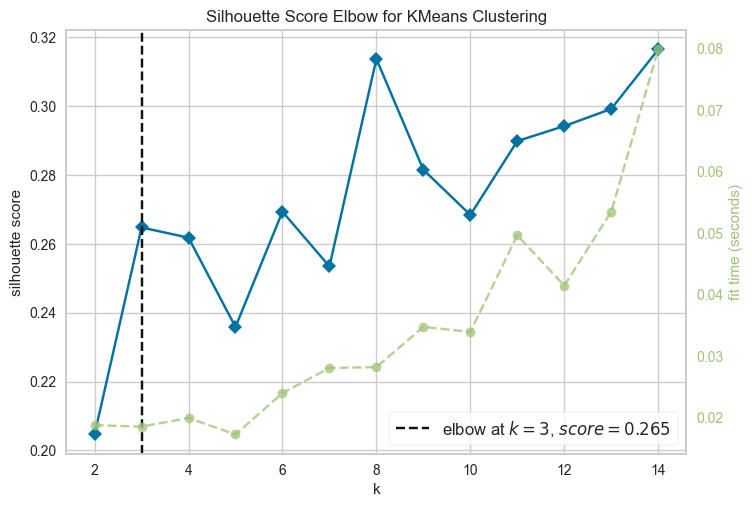

In [4]:
clusters = sc.Clustering(df)
clusters.sacar_clusters_kmeans()

In [30]:
df_kmeans, labels_kmeans = clusters.modelo_kmeans(df, 2)
df_kmeans

,Ship Mode,Customer ID,Segment,Market,Category,Sub-Category,Sales,Quantity,Order Priority,clusters_kmeans
0,0.000000,0.500000,1.000000,0.905067,0.012385,0.418446,0.102006,0.461538,0.055833,1
1,0.270998,0.468750,0.354352,1.000000,0.000000,0.486297,0.163837,0.615385,0.055833,1
2,0.171119,0.593750,1.000000,1.000000,0.012385,0.471744,0.228586,0.615385,1.000000,1
3,0.171119,0.718750,0.000000,0.905632,0.012385,0.471744,0.127753,0.307692,1.000000,1
4,0.000000,0.062500,1.000000,0.395837,0.012385,0.257418,0.125122,0.538462,0.055833,1
...,...,...,...,...,...,...,...,...,...,...
51285,0.000000,0.625000,0.354352,1.000000,1.000000,0.294651,0.002856,0.307692,1.000000,0
51286,1.000000,0.864583,1.000000,0.905067,1.000000,0.168966,0.000000,0.000000,1.000000,0
51287,0.000000,0.750000,0.000000,0.905067,1.000000,0.297486,0.000993,0.153846,0.484172,0
51288,1.000000,0.739583,0.000000,0.933321,1.000000,1.000000,0.000574,0.076923,1.000000,0


In [31]:
scores = clusters.calcular_metricas(labels_kmeans)
scores

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.410844,1.069581,31273


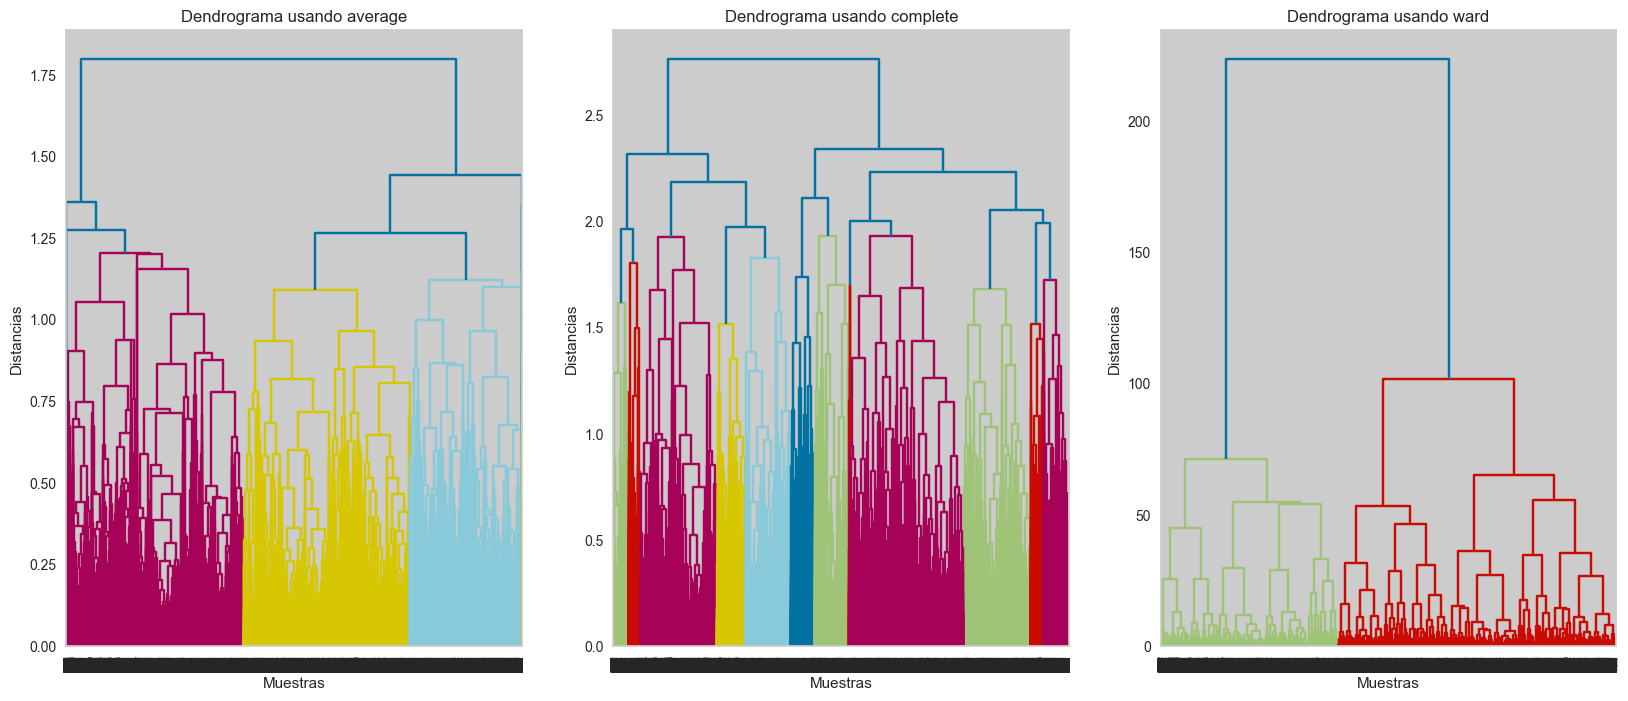

In [32]:
clusters.visualizar_dendrogramas()

In [33]:
df_dbscan = clusters.modelo_dbscan(df)
df_dbscan

eps: 0.5, min_samples: 3, silhouette: 0.3170279108694806
eps: 0.5, min_samples: 2, silhouette: 0.3170279108694806
eps: 0.5, min_samples: 1, silhouette: 0.3170279108694806
eps: 1.0, min_samples: 3, silhouette: 0.41084374865414536
eps: 1.0, min_samples: 2, silhouette: 0.41084374865414536
eps: 1.0, min_samples: 1, silhouette: 0.41084374865414536
eps: 1.5, min_samples: 3, silhouette: -1
eps: 1.5, min_samples: 2, silhouette: -1
eps: 1.5, min_samples: 1, silhouette: -1


,Ship Mode,Customer ID,Segment,Market,Category,Sub-Category,Sales,Quantity,Order Priority,clusters_kmeans,clusters_dbscan
0,0.000000,0.500000,1.000000,0.905067,0.012385,0.418446,0.102006,0.461538,0.055833,1,0
1,0.270998,0.468750,0.354352,1.000000,0.000000,0.486297,0.163837,0.615385,0.055833,1,0
2,0.171119,0.593750,1.000000,1.000000,0.012385,0.471744,0.228586,0.615385,1.000000,1,0
3,0.171119,0.718750,0.000000,0.905632,0.012385,0.471744,0.127753,0.307692,1.000000,1,0
4,0.000000,0.062500,1.000000,0.395837,0.012385,0.257418,0.125122,0.538462,0.055833,1,0
...,...,...,...,...,...,...,...,...,...,...,...
51285,0.000000,0.625000,0.354352,1.000000,1.000000,0.294651,0.002856,0.307692,1.000000,0,1
51286,1.000000,0.864583,1.000000,0.905067,1.000000,0.168966,0.000000,0.000000,1.000000,0,1
51287,0.000000,0.750000,0.000000,0.905067,1.000000,0.297486,0.000993,0.153846,0.484172,0,1
51288,1.000000,0.739583,0.000000,0.933321,1.000000,1.000000,0.000574,0.076923,1.000000,0,1


In [34]:
df_aglomerativo = clusters.modelo_aglomerativo(2, "ward", df)
df_aglomerativo

,Ship Mode,Customer ID,Segment,Market,Category,Sub-Category,Sales,Quantity,Order Priority,clusters_kmeans,clusters_dbscan,clusters_agglomerative
0,0.000000,0.500000,1.000000,0.905067,0.012385,0.418446,0.102006,0.461538,0.055833,1,0,1
1,0.270998,0.468750,0.354352,1.000000,0.000000,0.486297,0.163837,0.615385,0.055833,1,0,1
2,0.171119,0.593750,1.000000,1.000000,0.012385,0.471744,0.228586,0.615385,1.000000,1,0,1
3,0.171119,0.718750,0.000000,0.905632,0.012385,0.471744,0.127753,0.307692,1.000000,1,0,1
4,0.000000,0.062500,1.000000,0.395837,0.012385,0.257418,0.125122,0.538462,0.055833,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
51285,0.000000,0.625000,0.354352,1.000000,1.000000,0.294651,0.002856,0.307692,1.000000,0,1,0
51286,1.000000,0.864583,1.000000,0.905067,1.000000,0.168966,0.000000,0.000000,1.000000,0,1,0
51287,0.000000,0.750000,0.000000,0.905067,1.000000,0.297486,0.000993,0.153846,0.484172,0,1,0
51288,1.000000,0.739583,0.000000,0.933321,1.000000,1.000000,0.000574,0.076923,1.000000,0,1,0


In [35]:
df_divisivo = clusters.modelo_divisivo(df)
df_divisivo

,Ship Mode,Customer ID,Segment,Market,Category,Sub-Category,Sales,Quantity,Order Priority,clusters_kmeans,clusters_dbscan,clusters_agglomerative,clusters_divisive
0,0.000000,0.500000,1.000000,0.905067,0.012385,0.418446,0.102006,0.461538,0.055833,1,0,1,1
1,0.270998,0.468750,0.354352,1.000000,0.000000,0.486297,0.163837,0.615385,0.055833,1,0,1,1
2,0.171119,0.593750,1.000000,1.000000,0.012385,0.471744,0.228586,0.615385,1.000000,1,0,1,1
3,0.171119,0.718750,0.000000,0.905632,0.012385,0.471744,0.127753,0.307692,1.000000,1,0,1,1
4,0.000000,0.062500,1.000000,0.395837,0.012385,0.257418,0.125122,0.538462,0.055833,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,0.000000,0.625000,0.354352,1.000000,1.000000,0.294651,0.002856,0.307692,1.000000,0,1,0,2
51286,1.000000,0.864583,1.000000,0.905067,1.000000,0.168966,0.000000,0.000000,1.000000,0,1,0,2
51287,0.000000,0.750000,0.000000,0.905067,1.000000,0.297486,0.000993,0.153846,0.484172,0,1,0,2
51288,1.000000,0.739583,0.000000,0.933321,1.000000,1.000000,0.000574,0.076923,1.000000,0,1,0,2


Index(['Ship Mode', 'Customer ID', 'Segment', 'Market', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Order Priority'],
      dtype='object')


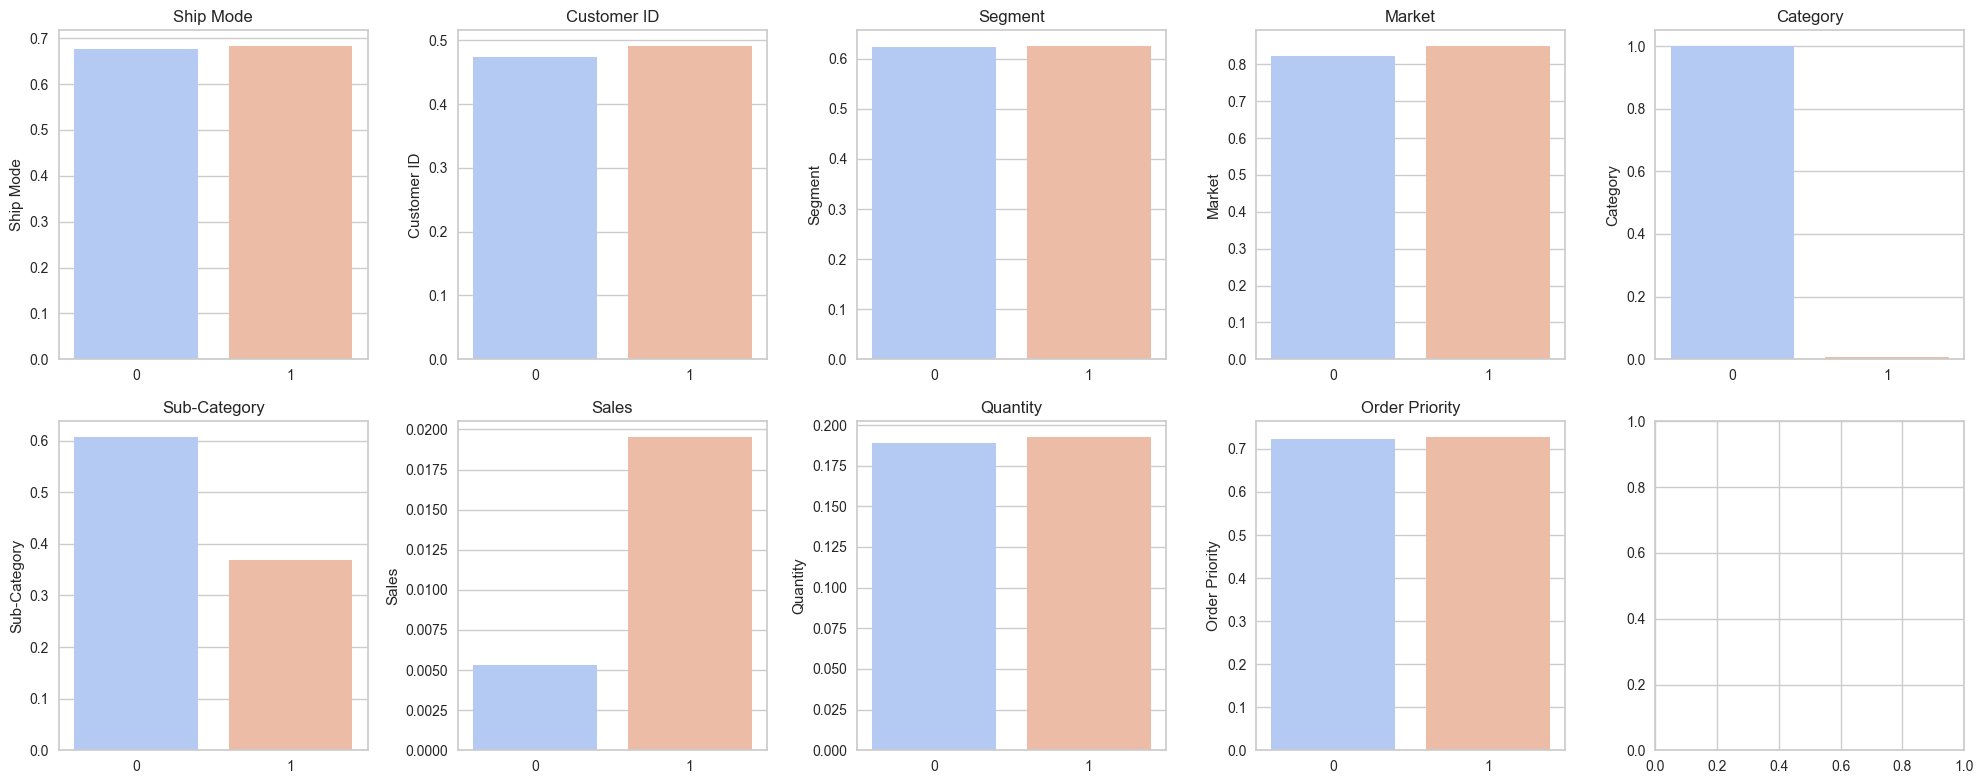

In [38]:
columnas_cluster = df_kmeans.filter(like="cluster").columns
lista_columnas = df_kmeans.drop(columns=columnas_cluster).columns
df_kmeans.drop(columns=columnas_cluster[1:], inplace=True)
print(lista_columnas)
fig, axes = plt.subplots(nrows=2, ncols=math.ceil(len(lista_columnas)/2), figsize=(20,8))
axes=axes.flat
for indice, columna in enumerate(lista_columnas):
    df_group= df_kmeans.groupby("clusters_kmeans")[columna].mean().reset_index()
    sns.barplot(x="clusters_kmeans", y= columna ,hue="clusters_kmeans", data= df_group, ax=axes[indice],palette="coolwarm")
    axes[indice].set_title(columna)
    axes[indice].set_xlabel("")
plt.tight_layout()

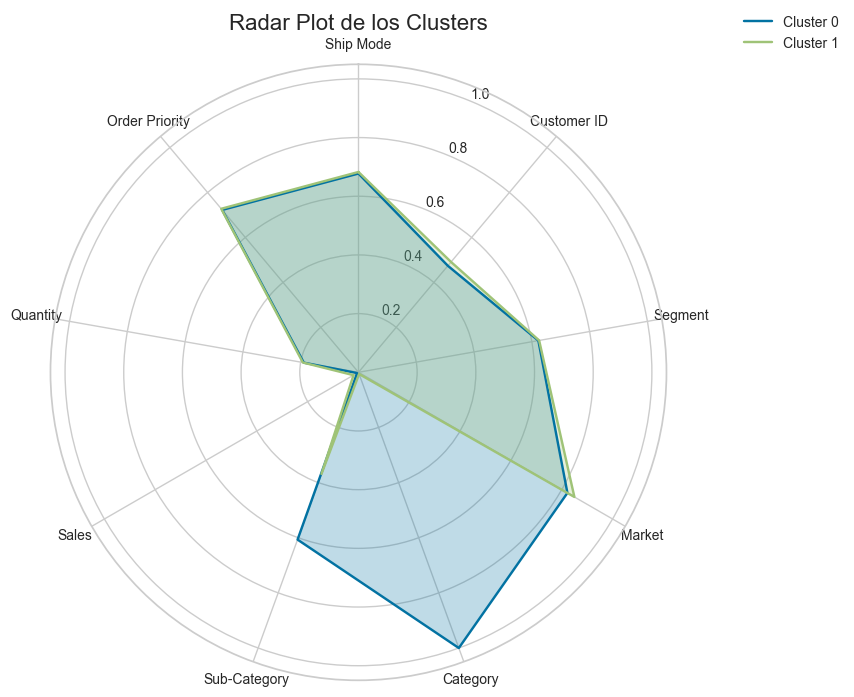

In [ ]:
# Agrupar por cluster y calcular la media
cluster_means = df_kmeans.groupby("clusters_kmeans")[lista_columnas].mean()

# Repetir la primera columna al final para cerrar el radar
cluster_means = pd.concat([cluster_means, cluster_means.iloc[:, 0:1]], axis=1)

# Crear los ángulos para el radar plot
num_vars = len(lista_columnas)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el gráfico

# Crear el radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Dibujar un gráfico para cada cluster
for i, row in cluster_means.iterrows():
    ax.plot(angles, row, label=f'Cluster {i}')
    ax.fill(angles, row, alpha=0.25)

# Configurar etiquetas de los ejes
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(lista_columnas)

# Añadir leyenda y título
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Radar Plot de los Clusters', size=16)
plt.show()

In [50]:
df_cluster0 = df_kmeans[df_kmeans["clusters_kmeans"] == "0"]
df_cluster1 = df_kmeans[df_kmeans["clusters_kmeans"] == "1"]

In [51]:
df_cluster0

,Ship Mode,Customer ID,Segment,Market,Category,Sub-Category,Sales,Quantity,Order Priority,clusters_kmeans
8,1.000000,0.625000,0.354352,0.905067,1.0,1.000000,0.224556,0.307692,0.000000,0
10,0.270998,0.541667,0.354352,0.905067,1.0,0.295596,0.183921,0.307692,0.484172,0
14,0.270998,0.677083,1.000000,1.000000,1.0,0.168966,0.163489,0.846154,0.055833,0
15,0.270998,0.562500,0.354352,0.905632,1.0,0.168966,0.082567,0.230769,0.055833,0
17,1.000000,0.312500,0.354352,0.905632,1.0,0.168966,0.351538,1.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
51285,0.000000,0.625000,0.354352,1.000000,1.0,0.294651,0.002856,0.307692,1.000000,0
51286,1.000000,0.864583,1.000000,0.905067,1.0,0.168966,0.000000,0.000000,1.000000,0
51287,0.000000,0.750000,0.000000,0.905067,1.0,0.297486,0.000993,0.153846,0.484172,0
51288,1.000000,0.739583,0.000000,0.933321,1.0,1.000000,0.000574,0.076923,1.000000,0


In [52]:
df_cluster1

,Ship Mode,Customer ID,Segment,Market,Category,Sub-Category,Sales,Quantity,Order Priority,clusters_kmeans
0,0.000000,0.500000,1.000000,0.905067,0.012385,0.418446,0.102006,0.461538,0.055833,1
1,0.270998,0.468750,0.354352,1.000000,0.000000,0.486297,0.163837,0.615385,0.055833,1
2,0.171119,0.593750,1.000000,1.000000,0.012385,0.471744,0.228586,0.615385,1.000000,1
3,0.171119,0.718750,0.000000,0.905632,0.012385,0.471744,0.127753,0.307692,1.000000,1
4,0.000000,0.062500,1.000000,0.395837,0.012385,0.257418,0.125122,0.538462,0.055833,1
...,...,...,...,...,...,...,...,...,...,...
51239,1.000000,0.395833,1.000000,0.905067,0.000000,0.436401,0.000156,0.076923,1.000000,1
51242,0.000000,0.531250,1.000000,0.905067,0.000000,0.436401,0.000753,0.615385,1.000000,1
51246,1.000000,0.208333,0.354352,0.437465,0.000000,0.436401,0.000311,0.000000,1.000000,1
51254,0.270998,0.562500,0.354352,0.905067,0.000000,0.436401,0.000653,0.000000,0.484172,1


In [ ]:
df_cluster0.to_pickle("../../datos/output/df_cluster0.pickle")
df_cluster1.to_pickle("../../datos/output/df_cluster1.pickle")